In [5]:
import pandas as pd    #import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore')

In [53]:
churn_df = pd.read_csv('C:\\Users\\User\\Downloads\\customer_churn.csv')   #loading dataset
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [7]:
churn_df.columns = churn_df.columns.str.lower().str.replace(' ', '_').str.replace('[^\w]', '')   #standarize column names

In [8]:
churn_df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
churn_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [10]:
churn_df.totalcharges = pd.to_numeric(churn_df.totalcharges, errors="coerce")
churn_df.totalcharges.dtypes

dtype('float64')

In [11]:
churn_df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [12]:
round(churn_df.isna().sum()* 100 / churn_df.shape[0], 2)    #only 0,16% are null values, let's remove them

gender              0.00
seniorcitizen       0.00
partner             0.00
dependents          0.00
tenure              0.00
phoneservice        0.00
onlinesecurity      0.00
onlinebackup        0.00
deviceprotection    0.00
techsupport         0.00
streamingtv         0.00
streamingmovies     0.00
contract            0.00
monthlycharges      0.00
totalcharges        0.16
churn               0.00
dtype: float64

In [13]:
churn_df.dropna(axis=0, inplace=True)

In [14]:
churn_df.isnull().sum().sum()

0

In [15]:
churn_df.shape

(7032, 16)

#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [16]:
def diff_function(data):
        categoricals = pd.DataFrame()
        continuous = pd.DataFrame()
        discretes = pd.DataFrame()
        for i in data:  
            if np.dtype(data[i]) == 'object':
                categoricals[i] = data[i]
            elif len(data[i].unique()) > 20 or np.dtype(data[i]) == 'float':  #(len(data[i].unique())*0.8):
                continuous[i] = data[i]
            else: 
                discretes[i] = data[i]
        return categoricals, continuous, discretes
    
categoricals, continuous, discretes = diff_function(churn_df)

In [17]:
categoricals.columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'churn'],
      dtype='object')

In [18]:
continuous.columns

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

In [19]:
discretes.columns

Index(['seniorcitizen'], dtype='object')

#Scale the features either by using normalizer or a standard scaler.

In [20]:
transformer = MinMaxScaler()   
x_norm = transformer.fit_transform(continuous)

continuous = pd.DataFrame(x_norm, columns=continuous.columns)
continuous

,tenure,monthlycharges,totalcharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7027,0.323944,0.662189,0.227521
7028,1.000000,0.845274,0.847461
7029,0.140845,0.112935,0.037809
7030,0.042254,0.558706,0.033210


In [23]:
discretes = pd.DataFrame(churn_df["seniorcitizen"])
discretes = pd.get_dummies(discretes, columns=discretes.columns, drop_first=True)
discretes

,seniorcitizen_1
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [24]:
discretes.reset_index(drop=True, inplace=True)
continuous.reset_index(drop=True, inplace=True)

X = pd.concat([discretes, continuous], axis=1)
X.shape

(7032, 4)

In [26]:
y = churn_df['churn']
y.shape

(7032,)

#Split the data into a training set and a test set.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Fit a logistic regression model on the training data
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
predictions = model.predict(X_test)

In [40]:
#check accuracy on the test data
model.score(X_test, y_test)

0.7803837953091685

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



<AxesSubplot: >

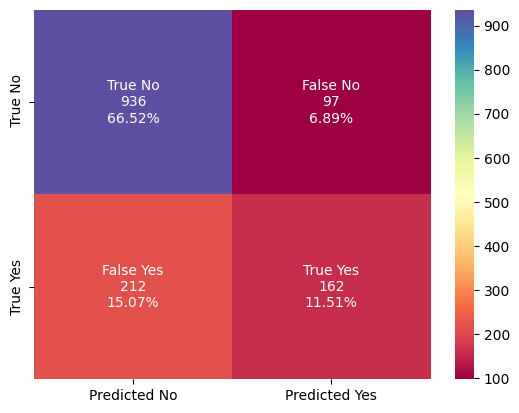

In [41]:
pred_test = model.predict(X_test)
print(classification_report(y_test, pred_test))

cm = confusion_matrix(y_test, pred_test)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', xticklabels=["Predicted No", "Predicted Yes"], yticklabels=[" True No", "True Yes"])

The model is trained with a much higher number of No outcomes than Yes, and as such it predicts with very high accuracy the No.

#Checking the imbalance

In [42]:
round(y_train.value_counts()/len(y_train)*100, 2)

No     73.42
Yes    26.58
Name: churn, dtype: float64

#Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [43]:
smote = SMOTE(k_neighbors = 3, random_state = 100)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

In [44]:
y_train.value_counts() 

No     4130
Yes    1495
Name: churn, dtype: int64

In [45]:
y_train_SMOTE.value_counts()

Yes    4130
No     4130
Name: churn, dtype: int64

In [46]:
model_SMOTE = LogisticRegression()
model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression()

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



<AxesSubplot: >

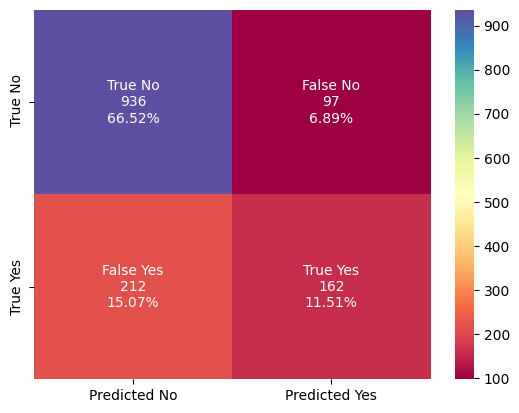

In [47]:
pred_test_SMOTE = model.predict(X_test)
print(classification_report(y_test, pred_test_SMOTE))

# Confusion Matrix on train set.
cm = confusion_matrix(y_test, pred_test_SMOTE)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', xticklabels=["Predicted No", "Predicted Yes"], yticklabels=[" True No", "True Yes"])

In [48]:
TL = TomekLinks()
X_train_TL, y_train_TL = TL.fit_resample(X_train, y_train)

In [49]:
y_train.value_counts() 

No     4130
Yes    1495
Name: churn, dtype: int64

In [50]:
y_train_TL.value_counts()    #syntetic data created

No     3727
Yes    1495
Name: churn, dtype: int64

In [51]:
model_TL = LogisticRegression()
model_TL.fit(X_train_TL, y_train_TL)

LogisticRegression()

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



<AxesSubplot: >

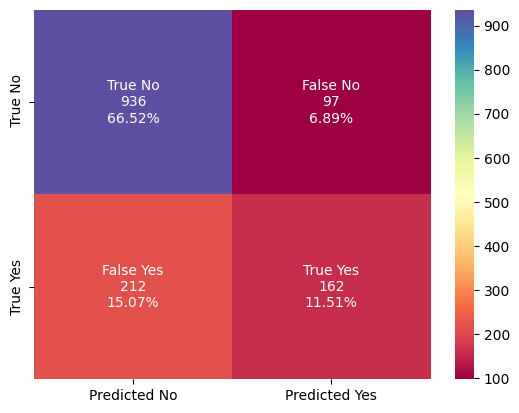

In [52]:
pred_test_TL = model.predict(X_test)
print(classification_report(y_test, pred_test_TL))

# Confusion Matrix on train set.
cm = confusion_matrix(y_test, pred_test_TL)
group_names = ['True No', 'False No', 'False Yes', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', xticklabels=["Predicted No", "Predicted Yes"], yticklabels=[" True No", "True Yes"])